In [2]:
import numpy as np
import colorspace
import matplotlib.pyplot as plt

In [2]:
from fast_jm import g, limit, chiu_limit

There are four curves on the diagram, so let's chose colours to distinguish between them.

In [16]:
def jm_diagram(colours, save=False):
    """
    'colours' should be a list of four colours.
    """
    rho = 1000000
    fig, ax = plt.subplots()
    c_samples = np.genfromtxt(f'data/rho{rho}-coverage-times.csv')
    u_samples = np.genfromtxt(f'data/unconstrained-rho{rho}-coverage-times.csv')

    my_range = np.arange(min(-20,min(c_samples)-0.1,min(u_samples)-0.1),max(50,max(c_samples)+0.1,max(u_samples)+0.1),0.1)

    c_curve = g(rho,c_samples) # constrained JM
    u_curve = g(rho,u_samples) # unconstrained
    c_curve.sort()
    u_curve.sort()
    ax.plot(c_curve, (np.arange(c_curve.size)+1)/c_curve.size, colours[0], linewidth=2, label="Empirical distribution of $g(T_\\rho,\\rho)$")
    c_limit = limit(my_range)
    ax.plot(my_range, c_limit, colours[1],linestyle='dashed',linewidth=1.5,label="Limiting cdf of $g(T_\\rho,\\rho)$ (from Thm 2.8)")
    ax.plot(u_curve, (np.arange(u_curve.size)+1)/u_curve.size, colours[-1], linewidth=2, label="Empirical distribution of $g(\\tilde T_\\rho,\\rho)$")
    u_limit = chiu_limit(my_range, rho)
    ax.plot(my_range, u_limit, colours[-2],linestyle='dashed',linewidth=1.5,label="Estimated cdf of $g(\\tilde T_\\rho,\\rho)$ (from Chiu 1995)")

    ax.set_ylim(0,1)
    ax.set_xlim(-10,40)
    ax.legend(loc='lower right')
    ax.set_title(f'Coverage time for JM processes in $[0,1]^2$ with arrival rate $\\rho=10^{int(np.log10(rho))}$')
    ax.set_xlabel('$\\beta$')
    ax.set_ylabel('')
    fig.tight_layout()
    if save:
        fig.savefig('jm_diagram.pdf')
        fig.savefig('jm_diagram.png')
    plt.show()

`colorspace` provides lots of choices for spectra. The `qualitative_hcl` ones are good for categorical data like ours, except they don't look very good when printed in black and white.

Below we've chosen the `"Harmonic"` palette from `colorspace`, removed the middle 20 percent, then (so that they're different in greyscale) lightened half the colours while darkening the other.

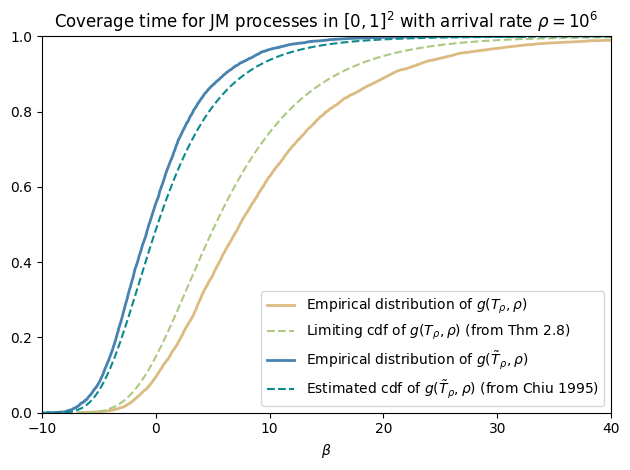

In [10]:
c = colorspace.qualitative_hcl("Harmonic")
colours = c(5)
colours = [colours[i] for i in [0,1,-2,-1]]
for i in range(2):
    colours[i] = colorspace.utils.lighten(colours[i],0.25)
for i in range(2,4):
    colours[i] = colorspace.utils.darken(colours[i],0.25)
jm_diagram(colours, save=False)

The above kind of works, except the yellows are a bit unpleasant. There are other palettes available from `colorspace`.

An alternative approach would be to make two curves different shades of red (the boundary-effect curve and its limit), and the other curves two shades of blue. Then after a little fiddling with the brightness again, that might look good. It gives us a lot of parameters to tune - which shades we use and how much darkening/brightening.

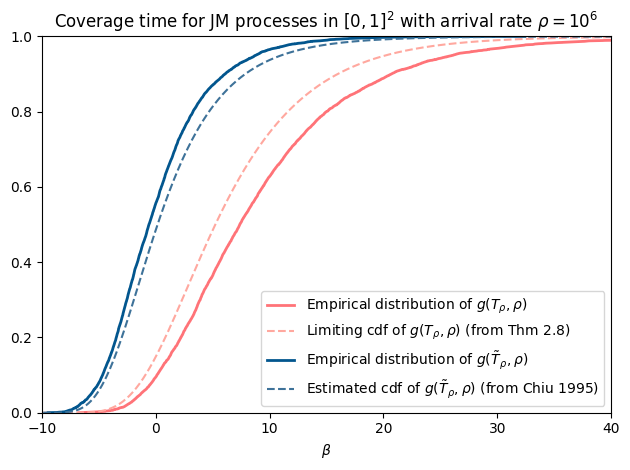

In [11]:
reds  = colorspace.sequential_hcl('Reds')
blues = colorspace.sequential_hcl('Blues')
w = 100
p1 = 0.3
p2 = 0.5
lblue = -0.33
lred = 0.33
r1 = reds(w)[int(p1*w)]
r2 = reds(w)[int(p2*w)]
b1 = blues(w)[int(p1*w)]
b2 = blues(w)[int(p2*w)]
b1 = colorspace.utils.lighten(b1,lblue)
b2 = colorspace.utils.lighten(b2,lblue)
r1 = colorspace.utils.lighten(r1,lred)
r2 = colorspace.utils.lighten(r2,lred)
colours = [r1, r2, b2, b1]
jm_diagram(colours, save=False)

The above was maybe a bit too complicated. Since the limiting curves are dashed and slightly thinner than the empirical curves, there's no need to change their colour. We could try setting both boundary-effect curves to red, both no-boundary-effect curves to blue, then change the lightness.

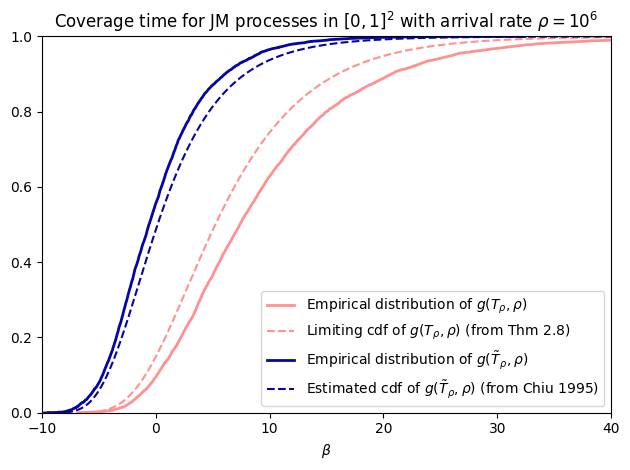

In [17]:
lblue = -0.4
lred = 0.4

r = '#ff0000'
b = '#0000ff'
b = colorspace.utils.lighten(b,lblue)
r = colorspace.utils.lighten(r,lred)
colours = [r, r, b, b]
jm_diagram(colours, save=True)

I think this simple one with two colours looks the best.

Another useful feature of `colorspace` is `cvd_emulator()`, which lets us simulate colour-blindness (as well as what our diagrams will look like when printed in greyscale). Let's use it to check the final version of our diagram will look good for all readers:

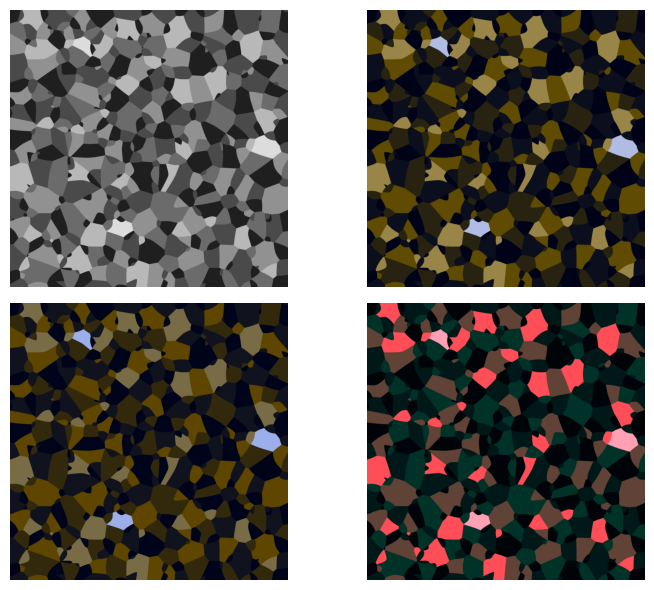

In [3]:
colorspace.cvd_emulator('jm.PNG', ["desaturate", "deutan", "protan", "tritan"],figsize=(8,6))